In [4]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt

isdebug=True

In [30]:
# 指定k个高斯分布參数。这里指定k=2。注意2个高斯分布具有同样均方差Sigma，均值分别为Mu1,Mu2。
def ini_data(Sigma,Mu1,Mu2,k,N):
    global X              #最终的训练数据集
    global Mu             #对想要预测的均值进行初始化
    global Expectations   #期望
    X = np.zeros((1,N))   #存储生成的训练数据
    Mu = np.random.random(2)  #随机生成两个值   
    Expectations = np.zeros((N,k))  #生成N*k的矩阵
    for i in range(0,N):  #生成训练样本
        if np.random.random(1) > 0.5:
            X[0,i] = np.random.normal()*Sigma + Mu1
        else:
            X[0,i] = np.random.normal()*Sigma + Mu2
    if isdebug:
        print("***********")
        print("初始观測数据X：")
        print(X)

In [31]:
# EM算法：步骤1，计算E[zij]
def e_step(Sigma,k,N):
    global Expectations
    global Mu
    global X
    for i in range(0,N):
        Denom = 0
        for j in range(0,k):
            Denom += math.exp((-1/(2*(float(Sigma**2))))*(float(X[0,i]-Mu[j]))**2)
        for j in range(0,k):
            Numer = math.exp((-1/(2*(float(Sigma**2))))*(float(X[0,i]-Mu[j]))**2)
            Expectations[i,j] = Numer / Denom
    if isdebug:
        print("***********")
        print("隐藏变量E（Z）：")
        print(Expectations)

In [32]:
# EM算法：步骤2，求最大化E[zij]的參数Mu
def m_step(k,N):
    global Expectations
    global X
    for j in range(0,k):
        Numer = 0
        Denom = 0
        for i in range(0,N):
            Numer += Expectations[i,j]*X[0,i]
            Denom +=Expectations[i,j]
        Mu[j] = Numer / Denom 

In [33]:
# 算法迭代iter_num次。或达到精度Epsilon停止迭代
def run(Sigma,Mu1,Mu2,k,N,iter_num,Epsilon):
    ini_data(Sigma,Mu1,Mu2,k,N)
    print("初始<u1,u2>:", Mu)
    for i in range(iter_num):
        Old_Mu = copy.deepcopy(Mu)
        e_step(Sigma,k,N)
        m_step(k,N)
        print("结果：",i,Mu)
        if sum(abs(Mu-Old_Mu)) < Epsilon:
            break

***********
初始观測数据X：
[[27.82508171 37.97597088 35.54020456 39.58627266 38.96730089 41.60105752
  44.50692551 17.84718108 37.2103319  26.73458374 22.38552847 17.31929058
  42.39008536 12.72705313 49.51154153 38.0554498  16.4623559  13.10063848
  41.97315924 14.47106481 51.34841989 21.33792679 20.61216046 47.39830018
  48.56275845 40.32628769 56.58113282 17.00858226 30.25188976 38.29119125
  19.60098559 17.31995501 36.43074813 27.99847337 29.08375884 20.7708197
  38.77496001 43.45446893 40.6674319  15.6923042  44.83199422 19.74667502
  19.51540587 20.39477171 29.08708132 35.09968415 21.54355044 14.98601529
  22.14301675 14.27206594 39.81949954 30.36900525 17.39542403 19.01650668
  39.01620722 48.95382074 32.3066109  15.20510389 49.3978413  29.09091392
  37.0973858  36.22156032 37.40889468 19.56498871 44.06723656 41.23102871
  23.75506267 24.18407741 51.75666446 21.53417618 43.02513681 46.08165857
  22.08217831 18.3137823  15.79003405 46.45496305 46.96101949 43.82361756
  34.04859038 16.1

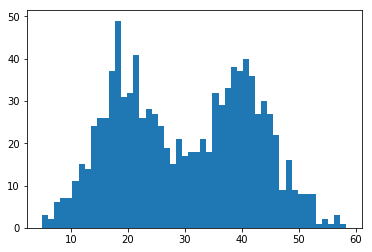

In [34]:
if __name__ == '__main__':
   run(6,40,20,2,1000,1000,0.0001)
   plt.hist(X[0,:],50)
   plt.show()